<a href="https://colab.research.google.com/github/HenriqueCCdA/bootCampAluraDataScience/blob/master/modulo1/desafios/Desafio_aula5_modulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

In [258]:
milhao = 1.e6

# Desafios aula 5 do modulo 1

## Desafio 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

In [259]:
uri = "https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv"
dados = pd.read_csv(uri, 
                    encoding="ISO-8859-1",
                    skiprows = 3, sep=";", 
                    skipfooter=12,
                    thousands=".",
                    decimal=",",
                    engine='python')

In [260]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
dados_usaveis = dados[colunas_usaveis]
dados_usaveis = dados_usaveis.set_index("Unidade da Federação")
dados_usaveis = dados_usaveis/milhao

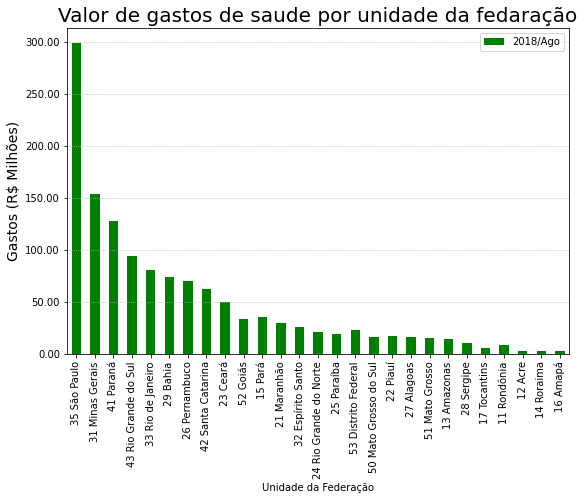

In [261]:
ax = dados_usaveis.sort_values("Total", ascending=False).plot(y = "2018/Ago",
                                                              kind = "bar",
                                                              figsize=(9,6),
                                                              color='green')

plt.title( "Valor de gastos de saude por unidade da fedaração", fontsize=20)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Gastos (R$ Milhões)", fontsize=14)
plt.grid(axis="y", ls=':')
plt.show()

## Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

In [262]:
gatos_por_estados_normalizado_RJ = dados_usaveis.copy()

In [263]:
for coluna in gatos_por_estados_normalizado_RJ.columns:
  gatos_por_estados_normalizado_RJ[coluna] = gatos_por_estados_normalizado_RJ[coluna] / gatos_por_estados_normalizado_RJ.loc["33 Rio de Janeiro", coluna]

In [264]:
gatos_por_estados_normalizado_RJ = gatos_por_estados_normalizado_RJ.drop("33 Rio de Janeiro")
gatos_por_estados_normalizado_RJ.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,0.060305,0.103235,0.034592,0.034623,0.036649,0.029261,0.061462,0.063471,0.063267,0.066080,0.070810,0.057949,0.062447,0.060731,0.072526,0.073337,0.069845,0.073081,0.068359,0.062873,0.075043,0.072550,0.078380,0.077984,0.071522,0.069328,0.080535,0.076341,0.078275,0.081505,0.074008,0.089145,0.079180,0.078160,0.073498,0.080992,0.070996,0.075165,0.087991,0.080272,...,0.103778,0.110013,0.112056,0.098519,0.110816,0.115502,0.112351,0.105482,0.110275,0.125420,0.117296,0.116732,0.108948,0.107038,0.101817,0.114073,0.095228,0.111267,0.110930,0.117954,0.116691,0.110736,0.117526,0.126963,0.110599,0.098484,0.108895,0.106984,0.106264,0.116035,0.119681,0.102889,0.110853,0.098446,0.105088,0.101870,0.089925,0.095353,0.112964,0.095822
12 Acre,0.039192,0.052729,0.040255,0.039280,0.040512,0.038049,0.050364,0.041033,0.046188,0.041432,0.044027,0.044199,0.054046,0.047852,0.041778,0.057622,0.050373,0.047965,0.047778,0.041058,0.054289,0.039974,0.051064,0.052725,0.038583,0.042590,0.050986,0.047883,0.041083,0.035533,0.040320,0.041825,0.038347,0.043902,0.045122,0.056021,0.048248,0.043460,0.046677,0.045841,...,0.044050,0.033184,0.031191,0.040392,0.038075,0.060572,0.056793,0.036676,0.049311,0.034474,0.034423,0.040319,0.029170,0.041701,0.037338,0.037274,0.033854,0.038008,0.044523,0.029787,0.033250,0.025925,0.040662,0.031793,0.032788,0.040688,0.036149,0.037389,0.036793,0.036170,0.037375,0.036585,0.040052,0.044901,0.039946,0.032024,0.034037,0.033279,0.039658,0.043384
13 Amazonas,0.205667,0.250719,0.183917,0.187480,0.174376,0.176403,0.187857,0.183697,0.190035,0.185600,0.164269,0.153764,0.160228,0.141914,0.195395,0.179810,0.168010,0.174147,0.170270,0.170425,0.176308,0.153111,0.181841,0.199372,0.171356,0.163375,0.190085,0.162489,0.190880,0.174178,0.144644,0.144620,0.168748,0.176564,0.169826,0.178759,0.160490,0.164017,0.176938,0.186180,...,0.196561,0.177022,0.190923,0.183229,0.187196,0.194579,0.181379,0.185028,0.187124,0.184500,0.189444,0.192680,0.187512,0.186662,0.177234,0.179328,0.204424,0.206014,0.205008,0.198556,0.209524,0.195415,0.214560,0.205962,0.190255,0.192475,0.177504,0.184178,0.199050,0.182090,0.194754,0.182573,0.192561,0.195934,0.195680,0.189200,0.231022,0.228370,0.195968,0.182713
14 Roraima,0.028573,0.027398,0.016126,0.019067,0.019201,0.017322,0.019985,0.017565,0.018478,0.025665,0.026467,0.024601,0.023498,0.020587,0.027421,0.025895,0.028732,0.029388,0.029005,0.032899,0.022371,0.026422,0.032224,0.030423,0.026297,0.033867,0.037139,0.029866,0.031736,0.030876,0.027267,0.032422,0.031733,0.029788,0.022433,0.023083,0.021491,0.024299,0.023377,0.017969,...,0.033834,0.038141,0.038221,0.037597,0.038474,0.033518,0.034577,0.037025,0.040179,0.040632,0.036248,0.035468,0.033497,0.038885,0.034163,0.034058,0.034751,0.037593,0.036921,0.041225,0.031543,0.035189,0.025258,0.031936,0.028804,0.035585,0.034891,0.044192,0.038775,0.036044,0.039063,0.039414,0.036783,0.038264,0.038145,0.040178,0.032343,0.037176,0.030545,0.031456
15 Pará,0.819307,0.688651,0.492232,0.473114,0.517689,0.483615,0.481273,0.458456,0.510901,0.517105,0.539407,0.472441,0.532717,0.509954,0.524009,0.538321,0.487917,0.501583,0.510067,0.490875,0.546073,0.468329,0.530544,0.546970,0.523674,0.48

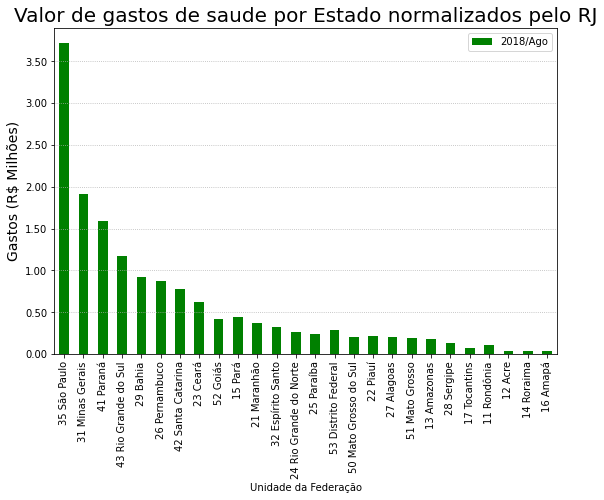

In [265]:
ax = gatos_por_estados_normalizado_RJ.sort_values("Total", ascending=False).plot(y = "2018/Ago",
                                                                          kind = "bar",
                                                                          figsize=(9,6),
                                                                          color='green')

plt.title( "Valor de gastos de saude por Estado normalizados pelo RJ", fontsize=20)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Gastos (R$ Milhões)", fontsize=14)
plt.grid(axis="y", ls=':')
plt.show()

## Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

In [266]:
dados_pol = pd.read_csv("populacao_por_estado_estimativa.csv", 
                    encoding="ISO-8859-1",
                    skiprows = 3, sep=";", 
                    skipfooter=12,
                    thousands=".",
                    decimal=",",
                    engine='python')
dados_pol.set_index("Unidade da Federação", inplace=True)

In [267]:
dados_pol.head()

,1992,1993,1994,1995,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1190739,1241693,1291214,1339507,1255522,1276173,1296856,1317614,1407886,1431777,1455907,1562085,1534594,1562417,1453756,1493566,1503928,1560501,1576455,1590011,1728214,1748531,1768204,1787279,1805788,1757589,1777225
12 Acre,428006,437495,446480,455242,500185,514050,527937,541873,574355,586942,600595,630328,669736,686652,655385,680073,691132,732793,746386,758786,776463,790101,803513,816687,829619,869265,881935
13 Amazonas,2165852,2217600,2269555,2320221,2460602,2520684,2580860,2641251,2900240,2961801,3031068,3138726,3232330,3311026,3221940,3341096,3393369,3480937,3538387,3590985,3807921,3873743,3938336,4001667,4063614,4080611,4144597
14 Roraima,228749,241099,251783,262201,254499,260705,266922,273160,337237,346871,357302,381896,391317,403344,395725,412783,421499,451227,460165,469524,488072,496936,505665,514229,522636,576568,605761
15 Pará,5328133,5212812,5332187,5448598,5650681,5768476,5886454,6004854,6341736,6453683,6574993,6850181,6970586,7110465,7090378,7321493,7457119,7588078,7688593,7822205,7999729,8104880,8206923,8305359,8366628,8513497,8602865


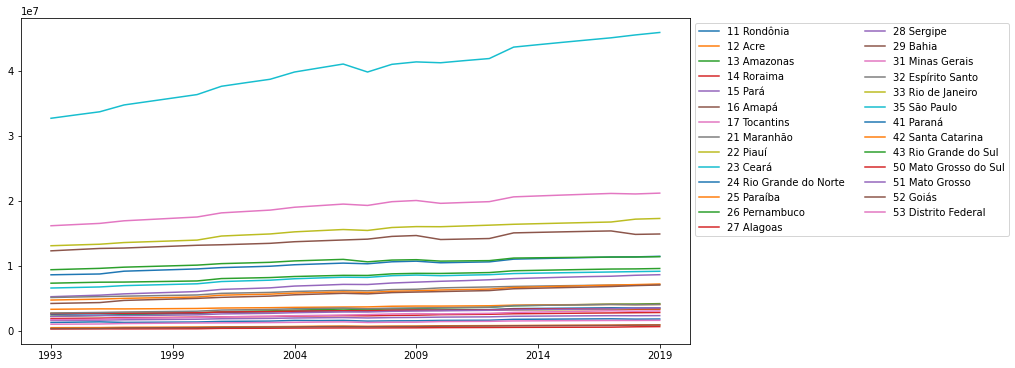

In [268]:
ax = dados_pol.T[1:].plot(figsize=(12,6))
ax.legend(loc='best', ncol=2, bbox_to_anchor=(1,1))

***Calculo do gatos por habitantes. Eu considerei que a polução não muda naquele ano.***

In [269]:
gatos_por_estados_por_hab = dados_usaveis.copy()
gatos_por_estados_por_hab = gatos_por_estados_por_hab*milhao
gatos_por_estados_por_hab = gatos_por_estados_por_hab.loc[:,"2008/Jan":"2019/Dez"]
anos = dados_pol.columns
for coluna in gatos_por_estados_por_hab.columns:
  for ano in anos:
    if coluna.startswith(ano):
      gatos_por_estados_por_hab[coluna] = gatos_por_estados_por_hab[coluna]/dados_pol[ano]

In [270]:
gatos_por_estados_por_hab.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,0.929673,1.962607,1.032216,1.021257,1.102030,0.941472,2.052322,2.163610,2.087071,2.054432,1.892008,1.962534,1.918489,1.901756,2.450213,2.398579,2.509666,2.464687,2.502239,2.349598,2.597885,2.619687,2.593930,2.361041,2.321700,2.493085,2.687300,2.905734,2.852422,3.123736,2.858571,3.247602,2.890798,2.816198,2.626555,2.798367,2.453998,2.726816,3.211111,3.025363,...,4.488738,4.073448,3.942958,3.895242,4.330551,3.766750,4.333392,4.821412,4.264471,4.401564,4.672795,4.240057,4.456638,4.794143,4.513760,4.157656,4.550749,5.060161,5.045431,5.047487,4.837082,4.730974,4.850679,5.221705,4.192673,5.026827,4.738415,4.784118,5.261971,4.581867,5.035796,5.418871,5.391535,4.440132,5.509922,5.160172,4.961019,5.640566,5.444119,4.549241
12 Acre,1.326940,2.201538,2.637994,2.544535,2.675366,2.688676,3.693360,3.071887,3.346271,2.828941,2.583527,3.287353,3.613082,3.260677,3.071300,4.100979,3.938562,3.520068,3.805627,3.338840,4.089634,3.140921,3.677339,3.399381,2.667157,3.261489,3.622958,3.881158,3.188086,2.900059,3.316480,3.244761,2.981397,3.368554,3.433827,4.088193,3.522446,3.329982,3.597819,3.649099,...,4.334630,3.899820,3.696917,3.997549,3.400462,4.051951,3.713084,3.366009,3.939943,2.889896,2.831131,3.783852,3.332931,5.472494,4.966411,3.146570,4.114505,2.812223,2.993833,3.525005,2.618576,3.726682,3.596636,3.449886,3.013707,3.471955,3.845334,2.442784,3.021373,2.161645,3.510961,2.734474,3.220907,3.696592,3.685898,3.634053,3.461418,3.543121,3.426014,3.259731
13 Amazonas,1.417358,2.130735,2.453277,2.472057,2.343961,2.537273,2.804127,2.799241,2.802404,2.579489,1.962095,2.327873,2.181628,1.969531,2.925642,2.606410,2.675523,2.602987,2.762268,2.822660,2.705056,2.450264,2.667096,2.706013,2.493633,2.633790,2.843459,2.772633,3.118298,2.992620,2.504598,2.361891,2.761893,2.851983,2.720722,2.751748,2.471539,2.650957,2.876831,3.126253,...,3.413490,2.777821,2.742618,2.791869,3.154797,2.706908,3.457615,3.063902,3.589306,3.147355,3.537981,3.504287,3.345457,3.588995,3.238183,3.240874,3.326037,3.206158,3.509843,3.588517,3.585789,3.553517,3.636841,3.535652,3.876617,4.008827,3.771779,3.468687,4.051394,3.467162,3.942247,3.769464,3.977025,3.721048,3.851276,3.809272,3.984812,3.795592,3.798827,3.461508
14 Roraima,1.593790,1.884621,1.741080,2.034954,2.089107,2.016654,2.414569,2.166444,2.205576,2.887159,2.558775,3.014512,2.575758,2.300192,3.305409,3.021915,3.683611,3.536397,3.788269,4.386721,2.763260,3.404063,3.805032,3.185405,2.952159,4.211879,4.285815,3.931410,3.999605,4.092484,3.642331,4.084781,4.006598,3.711816,2.772439,2.732227,2.544839,3.019936,2.922573,2.320165,...,5.188043,5.360062,4.820013,4.627910,4.460562,4.454768,4.830789,5.046686,4.803792,5.272542,5.507040,5.590848,5.346132,4.806901,4.799735,5.042300,5.054383,4.997296,4.752993,4.675051,4.533542,5.239137,4.961400,4.752411,4.663983,5.177237,4.807553,5.097004,4.173079,4.271722,3.175246,3.999013,4.119597,4.706958,5.179497,6.253547,5.311036,5.140542,5.213240,5.112764
15 Pará,2.576625,2.670734,2.996294,2.846800,3.175575,3.174310,3.278324,3.188041,3.438132,3.279620,2.940152,3.263925,3.300647,3.220539,3.570321,3.550832,3.535736,3.411599,3.765440,3.699622,3.812549,3.410489,3.541027,3.405591,3.495904,3

**Verificando o calculo por hab foi feito de forma correta. Verificao feita por amostragem**

In [271]:
from termcolor import colored
from random import sample

estados = sample(dados_usaveis.index.tolist(), 3)
anos = ['2008', '2009'] + ['20'+ str(i) for i in range(10,20)]
anos = sample(anos, 3)
meses= ['/Jan', '/Fev', '/Mar', '/Abr', '/Mai', '/Jun', '/Jul', '/Ago', '/Set', '/Out', '/Nov', '/Dez']
meses = sample(meses, 3)

for estado in estados:
  for ano in anos:
    for mes in meses:
      print(f"Verificao para o estado {estado} no {ano}{mes} ", end=" ")
      gastos = dados_usaveis.loc[estado, ano+mes]*milhao
      pol = dados_pol.loc[estado, ano]
      gastos_por_hab = gastos/pol
      valor_tabela = gatos_por_estados_por_hab.loc[estado, ano+mes]
      if gastos_por_hab == valor_tabela:
        print(colored("OK!", "green"))
      else:
        print(colored("Valores diferentes", "red"))
        print(gastos, pol, gastos_por_hab, valor_tabela)

Verificao para o estado 16 Amapá no 2008/Dez  OK!
Verificao para o estado 16 Amapá no 2008/Mai  OK!
Verificao para o estado 16 Amapá no 2008/Jul  OK!
Verificao para o estado 16 Amapá no 2013/Dez  OK!
Verificao para o estado 16 Amapá no 2013/Mai  OK!
Verificao para o estado 16 Amapá no 2013/Jul  OK!
Verificao para o estado 16 Amapá no 2010/Dez  OK!
Verificao para o estado 16 Amapá no 2010/Mai  OK!
Verificao para o estado 16 Amapá no 2010/Jul  OK!
Verificao para o estado 29 Bahia no 2008/Dez  OK!
Verificao para o estado 29 Bahia no 2008/Mai  OK!
Verificao para o estado 29 Bahia no 2008/Jul  OK!
Verificao para o estado 29 Bahia no 2013/Dez  OK!
Verificao para o estado 29 Bahia no 2013/Mai  OK!
Verificao para o estado 29 Bahia no 2013/Jul  OK!
Verificao para o estado 29 Bahia no 2010/Dez  OK!
Verificao para o estado 29 Bahia no 2010/Mai  OK!
Verificao para o estado 29 Bahia no 2010/Jul  OK!
Verificao para o estado 31 Minas Gerais no 2008/Dez  OK!
Verificao para o estado 31 Minas Gerais no 

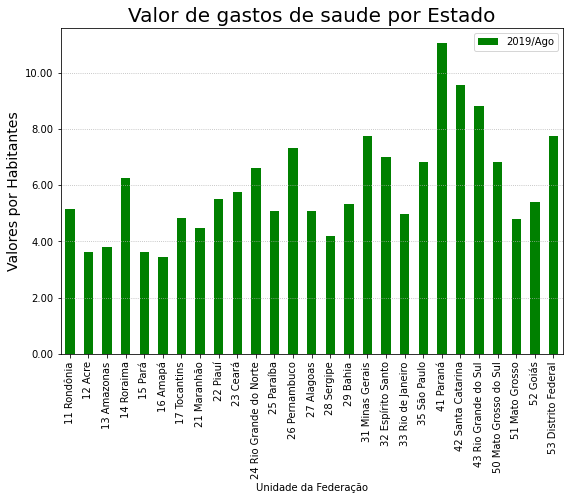

In [272]:
ax = gatos_por_estados_por_hab.plot(y = "2019/Ago",
                             kind = "bar",
                             figsize=(9,6),
                            color='green')

plt.title( "Valor de gastos de saude por Estado", fontsize=20)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valores por Habitantes", fontsize=14)
plt.grid(axis="y", ls=':')
plt.show()

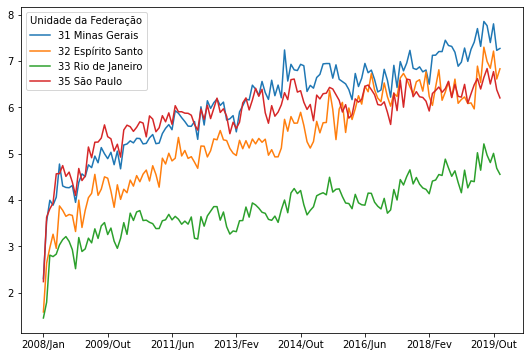

In [273]:
estados = ['31 Minas Gerais'  , '32 Espírito Santo',
           '33 Rio de Janeiro', '35 São Paulo']

ax = gatos_por_estados_por_hab.loc[estados].T.plot(kind = "line",
                             figsize=(9,6))
plt.show()

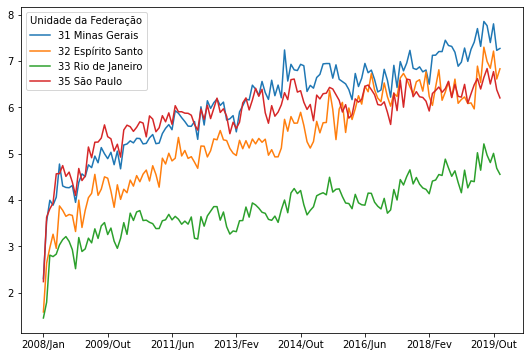

In [274]:
ax = gatos_por_estados_por_hab.loc[estados].T.plot(kind = "line",
                             figsize=(9,6))

In [275]:
gatos_por_estados_por_hab.loc[['31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo']]

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31 Minas Gerais,2.300831,3.536211,3.991489,3.885958,4.058143,4.773712,4.300240,4.268122,4.262038,4.310301,3.946079,4.378712,4.561038,4.500109,4.756523,4.696655,4.945518,4.801377,5.129084,4.995594,4.889592,5.027851,4.759708,5.053130,4.670473,5.185021,5.206392,5.274044,5.230296,5.329217,5.324465,5.208258,5.220458,5.339275,5.410965,5.213162,5.225741,5.431118,5.545016,5.624476,...,6.598750,6.329569,6.372721,6.818619,6.581605,6.217292,6.904539,6.426319,6.984834,6.784434,6.953261,7.227702,6.841465,6.815466,6.871521,6.763812,6.803897,6.497188,7.120972,7.124039,7.202573,7.201019,7.446544,7.332540,7.312882,7.187432,6.885128,6.972943,7.278009,6.989953,7.249341,7.406068,7.698267,7.314073,7.851533,7.760815,7.396166,7.800199,7.227922,7.269197
32 Espírito Santo,1.579988,2.635536,2.967759,3.258535,2.952999,3.869606,3.774378,3.645014,3.685214,3.664542,3.317281,3.994936,3.404622,3.773631,4.047038,4.141146,4.550783,4.097696,4.232520,4.497025,4.467846,4.190964,3.839674,4.325844,4.010990,4.230529,4.153726,4.427358,4.297091,4.524028,4.391898,4.556263,4.643297,4.408067,4.737231,4.548468,4.274367,4.900423,4.774178,5.006646,...,6.376677,6.195549,6.119385,6.525028,6.226459,6.023169,6.301307,6.232387,6.632554,6.729889,6.605689,6.440477,6.289897,6.550523,6.594363,6.347496,6.764290,6.233651,6.039710,6.439642,6.808774,6.150302,6.326265,6.547533,6.214330,6.606575,6.084520,6.168092,6.222341,6.079992,6.093947,5.963712,6.887610,6.533858,7.296239,6.987427,6.841837,7.211701,6.609311,6.829971
33 Rio de Janeiro,1.450651,1.788915,2.807841,2.775554,2.829511,3.027666,3.142089,3.207633,3.104160,2.925520,2.514266,3.186773,2.885832,2.941475,3.173487,3.072250,3.375220,3.167986,3.438399,3.510381,3.251865,3.391825,3.108677,2.954033,3.167265,3.508692,3.255737,3.713800,3.555559,3.739456,3.768677,3.554531,3.562210,3.515560,3.486819,3.380476,3.381865,3.549371,3.570514,3.687474,...,3.950642,3.862353,3.804727,4.032349,3.712078,3.783900,4.223592,3.997357,4.438298,4.321362,4.504025,4.648461,4.343715,4.483118,4.339282,4.257234,4.226739,4.132350,4.405706,4.428808,4.547403,4.527016,4.879609,4.688460,4.509508,4.627318,4.375063,4.154231,4.641823,4.259242,4.410748,4.393496,5.018098,4.640951,5.208508,4.965024,4.805761,5.003926,4.682533,4.551411
35 São Paulo,2.235426,3.625252,3.805927,3.931253,4.562593,4.566780,4.740079,4.507368,4.599582,4.381841,4.096163,4.678119,4.417094,4.515154,5.141544,4.909770,5.244547,5.248285,5.334452,5.618995,5.364096,5.318898,5.052537,5.201322,4.923771,5.508763,5.612884,5.580042,5.479012,5.567288,5.685293,5.659181,5.360377,5.812788,5.743436,5.471237,5.556092,5.817837,5.685488,5.878366,...,6.271006,6.057715,6.043818,6.116740,5.891305,5.628225,6.306825,5.926639,6.582814,6.000604,6.605660,6.592975,6.227178,6.336433,6.226182,6.210918,6.131100,5.918558,6.297374,6.361848,6.436345,6.322549,6.401663,6.559271,6.208733,6.492722,6.235276,6.218394,6.493603,6.085213,6.289751,6.486081,6.617930,6.393593,6.642861,6.835262,6.501613,6.769458,6.377565,6.201125


## Desafio 04: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

In [278]:
gatos_por_estados_por_hab_com_regiao = gatos_por_estados_por_hab.copy()

estados_index =  gatos_por_estados_por_hab.index;

nome_regioes = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste', '4': 'Sul', '5': 'Centro-Oeste'}
gatos_por_estados_por_hab_com_regiao["Regiao"] = list(map(lambda estado_index: nome_regioes[estado_index[0]] ,  estados_index))

In [331]:
gatos_por_estados_por_hab_com_regiao_medios = gatos_por_estados_por_hab_com_regiao.groupby(["Regiao"]).mean()
gatos_por_estados_por_hab_com_regiao_medios

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
Regiao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Centro-Oeste,2.099641,3.181700,3.428378,3.664703,4.010814,4.068788,3.978410,4.040004,4.038368,4.192983,3.455823,4.140547,3.956640,3.882858,4.457664,4.326050,4.742153,4.792354,4.650436,4.642019,4.710786,4.481855,4.262120,4.611651,4.315990,4.700609,4.581527,4.713083,4.508007,4.691735,4.862252,4.714542,4.567784,4.679237,4.586381,4.428463,4.172583,4.902982,5.012985,4.908304,...,5.206620,5.187070,5.298001,5.270698,5.167480,5.070281,5.489684,5.286616,5.426218,5.116878,5.299481,5.470399,5.633722,5.381926,5.454959,5.185659,5.360590,5.358703,5.769501,5.621390,5.680127,5.826881,5.940328,5.813255,5.650314,5.438289,5.172552,4.889747,5.486696,5.422960,5.818421,5.612856,5.801403,5.852495,6.145491,6.189712,5.698729,5.650764,5.602472,5.486583
Nordeste,1.930747,2.640002,2.941891,3.157206,3.123456,3.215681,3.301634,3.207190,3.229416,3.135880,2.922929,3.243591,2.978448,3.157629,3.535076,3.556161,3.817266,3.684990,3.721186,3.699847,3.757111,3.764942,3.743709,3.706882,3.459276,3.831045,4.010544,4.027226,3.755923,3.897087,4.024012,3.832159,3.798971,3.903367,3.735285,3.794451,3.712903,3.877393,4.009553,3.905355,...,4.493285,4.598573,4.426225,4.427710,4.501237,4.386513,4.775215,4.641657,4.972563,4.875340,4.890178,5.017831,4.965833,5.032692,4.760631,4.793932,4.855060,4.614238,4.986282,5.122974,5.225841,5.022504,5.306996,5.339682,5.103675,5.218453,5.062465,4.818294,5.156273,4.911969,5.202338,5.234504,5.560525,5.276192,5.470062,5.484005,5.388442,5.507802,5.324961,5.115595
Norte,1.765749,2.401846,2.470945,2.381892,2.443244,2.508125,2.974587,2.860494,2.991895,2.901719,2.623467,2.990951,2.961532,2.842522,3.281722,3.455539,3.498554,3.337144,3.478933,3.486879,3.410467,3.255532,3.388581,3.208152,2.994229,3.334194,3.453856,3.507350,3.457003,3.448856,3.350656,3.434072,3.379615,3.425008,3.230757,3.371236,3.114933,3.276612,3.426802,3.335811,...,3.954209,3.690358,3.615953,3.609476,3.610060,3.550530,3.817095,3.707798,3.878492,3.750702,3.798525,3.951883,3.863461,4.084102,3.908354,3.601322,3.772060,3.652255,3.748469,3.724216,3.537039,3.946510,3.815231,3.943802,3.765195,4.092211,3.843415,3.775339,3.877046,3.536475,3.810909,3.944187,4.079549,3.866583,4.143007,4.393333,4.232962,4.255368,4.144242,3.979911
Sudeste,1.891724,2.896479,3.393254,3.462825,3.600812,4.059441,3.989197,3.907034,3.912748,3.820551,3.468447,4.059635,3.817147,3.932592,4.279648,4.204955,4.529017,4.328836,4.533614,4.655499,4.493350,4.482385,4.190149,4.383582,4.193125,4.608251,4.557185,4.748811,4.640489,4.789997,4.792583,4.744558,4.696586,4.768922,4.844613,4.653335,4.609516,4.924687,4.893799,5.049240,...,5.799269,5.611296,5.585163,5.873184,5.602862,5.413146,5.934066,5.645675,6.159625,5.959072,6.167159,6.227404,5.925564,6.046385,6.007837,5.894865,5.981506,5.695437,5.965940,6.088584,6.248773,6.050221,6.263520,6.281951,6.061363,6.228512,5.894997,5.878415,6.158944,5.853600,6.010947,6.062339,6.555476,6.220619,6.749785,6.637132,6.386344,6.696321,6.224333,6.212926
Sul,3.063249,4.917441,4.749168,4.888469,4.677505,5.076352,5.263350,5.237724,5.164504,5.205015,4.704070,5.510130,5.697464,5.271231,5.871090,5.762991,5.859395,5.858906,6.190856,6.188597,6.029456,6.051459,5.907783,6.075816,5.531515,6.077518,6.356993,6.341110

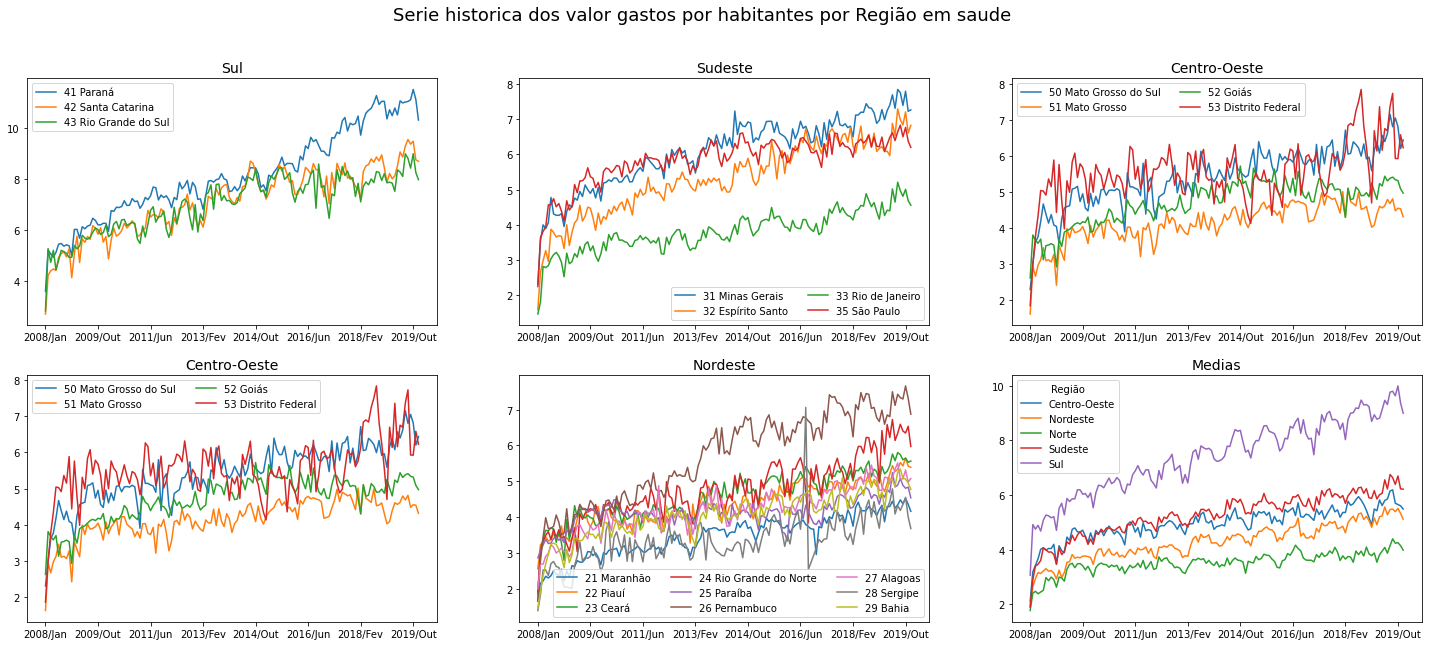

In [340]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

fig.suptitle('Serie historica dos valor gastos por habitantes por Região em saude', fontsize=18)

# Região Sul
gatos_por_estados_por_hab_com_regiao.query("Regiao == 'Sul'").drop("Regiao", axis = True).T.plot(kind = "line",
                             ax=axes[0, 0])
axes[0, 0].set_title('Sul', fontsize=14)
axes[0, 0].legend(ncol = 1)

# Região Sudeste
gatos_por_estados_por_hab_com_regiao.query("Regiao == 'Sudeste'").drop("Regiao", axis = True).T.plot(kind = "line",
                             ax=axes[0, 1])
axes[0, 1].set_title('Sudeste', fontsize=14)
axes[0, 1].legend(ncol = 2)

# Região Centro-Oeste
gatos_por_estados_por_hab_com_regiao.query("Regiao == 'Centro-Oeste'").drop("Regiao", axis = True).T.plot(kind = "line",
                             ax=axes[1, 0])
axes[1, 0].set_title('Centro-Oeste', fontsize=14)
axes[1, 0].legend(ncol = 2)

# Região Nordeste
gatos_por_estados_por_hab_com_regiao.query("Regiao == 'Nordeste'").drop("Regiao", axis = True).T.plot(kind = "line",
                             ax=axes[1, 1])
axes[1, 1].set_title('Nordeste', fontsize=14)
axes[1, 1].legend(ncol = 3)

# Região Centro-Oeste
gatos_por_estados_por_hab_com_regiao.query("Regiao == 'Centro-Oeste'").drop("Regiao", axis = True).T.plot(kind = "line",
                             ax=axes[0, 2])
axes[0, 2].set_title('Centro-Oeste', fontsize=14)
axes[0, 2].legend(ncol = 2)

# Região Medias
gatos_por_estados_por_hab_com_regiao_medios.T.plot(kind = "line",
                                              ax=axes[1, 2])
axes[1, 2].set_title('Medias', fontsize=14)
axes[1, 2].legend(title = "Região", ncol = 1)

Os graficos por regiões mostram um aumento de gastos por habitante crescente em todas as regiões.  O interessante é que a região sul que mostras os maiores gastos. 

Para maiores analise seria necessario fazer uma correção monetária para saber se existe um aumento real ou não nos gasto por habitantes.